In [1]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Fraud.csv",header=0)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


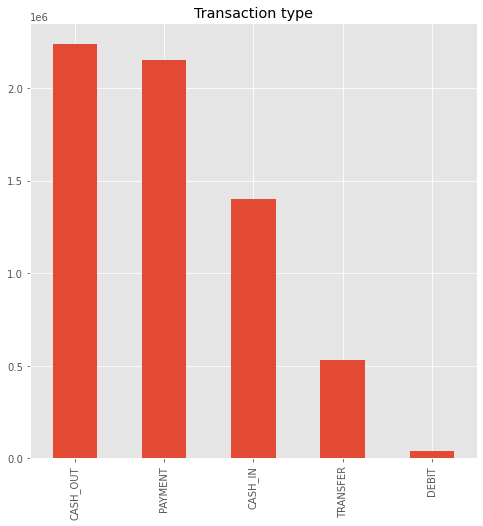

In [10]:
# sns.countplot(x='type',data=df)
print(df.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

In [9]:
df["isFraud"]=df["isFraud"].astype("category")

In [10]:
pd.crosstab(df['type'],df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


We can see that fraud occurs only in CASH_OUT AND TRANSFER transactions. This is inline with the description given for 'isFraud' variable. This means that we can make a model only using TRANSFER and CASH_OUT types while directly returning result as 'notFraud' for other types using an if condition check.

In [11]:
df["isFraud"]=df["isFraud"].astype("int")

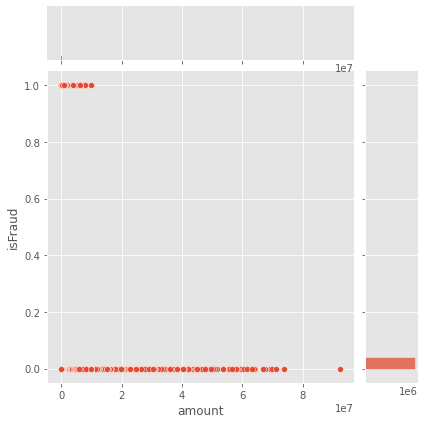

In [12]:
sns.jointplot(x="amount",y="isFraud",data=df)

<AxesSubplot:xlabel='isFraud', ylabel='count'>

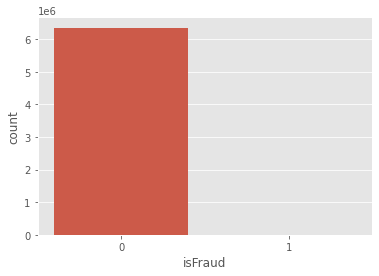

In [14]:
sns.countplot(x='isFraud',data=df)

In [15]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:ylabel='amount'>

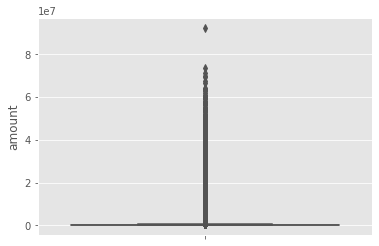

In [16]:
sns.boxplot(y="amount",data=df)

<AxesSubplot:ylabel='oldbalanceOrg'>

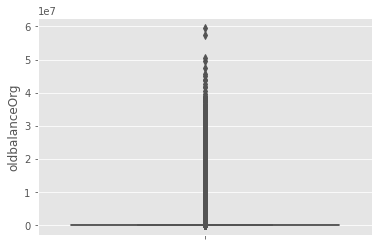

In [17]:
sns.boxplot(y="oldbalanceOrg",data=df)

<AxesSubplot:ylabel='newbalanceOrig'>

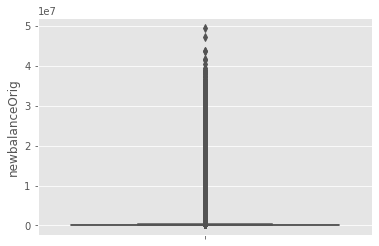

In [18]:
sns.boxplot(y="newbalanceOrig",data=df)

Outlier treatment

In [20]:
df_n=df[(df["type"]=="CASH_OUT") | (df["type"]=="TRANSFER")]

In [23]:
df_n["c"]=list(map(lambda x: x.startswith('C'),df_n["nameOrig"]))

<ipython-input-23-3034b0d9da8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n["c"]=list(map(lambda x: x.startswith('C'),df_n["nameOrig"]))


In [25]:
df_n["d"]=list(map(lambda x: x.startswith('C'),df_n["nameDest"]))

<ipython-input-25-1e535a4ad9b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n["d"]=list(map(lambda x: x.startswith('C'),df_n["nameDest"]))


In [26]:
df_new=df_n[(df_n.c)&(df_n.d)]

In [27]:
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,c,d
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,True,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,True,True
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,True,True
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,True,True
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,True,True


In [32]:
df=df_new

Outlier treatement

In [33]:
uv1= np.percentile(df.amount,[99])[0]

In [34]:
df.amount[(df.amount>3*uv1)]=3*uv1

<ipython-input-34-243ad5a54087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.amount[(df.amount>3*uv1)]=3*uv1


In [35]:
uv2= np.percentile(df.oldbalanceOrg,[99])[0]

df.oldbalanceOrg[(df.oldbalanceOrg>3*uv2)]=3*uv2

<ipython-input-35-05c6308c7528>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.oldbalanceOrg[(df.oldbalanceOrg>3*uv2)]=3*uv2


In [36]:
uv3= np.percentile(df.newbalanceOrig,[99])[0]

df.newbalanceOrig[(df.newbalanceOrig>3*uv3)]=3*uv3

<ipython-input-36-09b4c40523ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.newbalanceOrig[(df.newbalanceOrig>3*uv3)]=3*uv3


In [37]:
df = pd.get_dummies(df,columns=["type"],drop_first=True)

In [55]:
df["org_diff"]=df["newbalanceOrig"]-df["oldbalanceOrg"]

In [56]:
df["dest_diff"]=df["oldbalanceDest"]-df["newbalanceDest"]

In [41]:
del df["nameOrig"]
del df["nameDest"]
del df["c"]
del df["d"]
del df["isFlaggedFraud"]

In [50]:
df.reset_index(inplace=True)  ### .reset_index(drop=True)

In [52]:
del df["index"]

In [45]:
df.shape

(2770409, 10)

In [57]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER,org_diff,dest_diff
step,1.000000,0.044075,-0.012050,-0.026622,0.037778,0.037475,0.048671,0.016022,-0.006402,-0.013277
amount,0.044075,1.000000,0.073184,-0.049019,0.233987,0.406851,0.096664,0.432317,-0.158304,-0.776130
oldbalanceOrg,-0.012050,0.073184,1.000000,0.777608,-0.034445,-0.026943,0.302674,0.003415,-0.808574,-0.016585
newbalanceOrig,-0.026622,-0.049019,0.777608,1.000000,-0.021684,-0.027959,0.004841,-0.050710,-0.258802,0.033227
oldbalanceDest,0.037778,0.233987,-0.034445,-0.021684,1.000000,0.970060,-0.014960,0.099794,0.032624,-0.264405
newbalanceDest,0.037475,0.406851,-0.026943,-0.027959,0.970060,1.000000,-0.008978,0.157024,0.015228,-0.490709
isFraud,0.048671,0.096664,0.302674,0.004841,-0.014960,-0.008978,1.000000,0.042400,-0.460458,-0.018022
type_TRANSFER,0.016022,0.432317,0.003415,-0.050710,0.099794,0.157024,0.042400,1.000000,-0.052701,-0.265513
org_diff,-0.006402,-0.158304,-0.808574,-0.258802,0.032624,0.015228,-0.460458,-0.052701,1.000000,0.056574
dest_diff,-0.013277,-0.776130,-0.016585,0.033227,-0.264405,-0.490709,-0.018022,-0.265513,0.056574,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

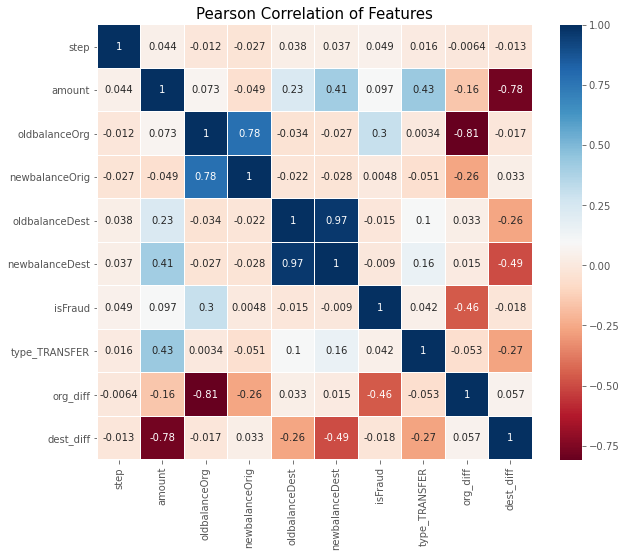

In [58]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

As we can see that oldbalanceOrg and newbalanceOrig are highely correlated this can lead to multi-collinearity,so we will remove newbalanceOrig as it has low absolute value of correaltion with target variable(isFraud).similarly for oldbalanceDest	and  newbalanceDest,we will remove newbalanceDest,and from amount and dest_diff we remove dest_diff,and from org_diff and oldbalanceOrig we remove oldbalanceOrig

In [59]:
del df["newbalanceOrig"]
del df["newbalanceDest"]
del df["dest_diff"]
del df["oldbalanceOrg"]

In [60]:
df.head()

,step,amount,oldbalanceDest,isFraud,type_TRANSFER,org_diff
0,1,181.00,0.0,1,1,-181.0
1,1,181.00,21182.0,1,0,-181.0
2,1,229133.94,5083.0,0,0,-15325.0
3,1,215310.30,22425.0,0,1,-705.0
4,1,311685.89,6267.0,0,1,-10835.0


In [61]:
df["isFraud"].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

As the target variable has very less values marked as 1 and rest others are 0, so we will use StratifiedShuffleSplit from sklearn

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
new_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in new_split.split(df,df["isFraud"]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [63]:
strat_test_set["isFraud"].value_counts()

0    552439
1      1643
Name: isFraud, dtype: int64

In [64]:
strat_train_set["isFraud"].value_counts()

0    2209757
1       6570
Name: isFraud, dtype: int64

In [65]:
strat_train_set.head()

,step,amount,oldbalanceDest,isFraud,type_TRANSFER,org_diff
2341146,375,71884.81,730831.13,0,0,0.00
2421446,382,222936.06,1166254.26,0,0,-222936.06
963237,185,284645.66,341292.97,0,0,-586.00
1140129,207,239069.35,162834.74,0,0,-10167.00
187133,18,193796.39,5183953.70,0,0,0.00


In [66]:
X_train=strat_train_set.loc[:,df.columns!="isFraud"]
X_test=strat_test_set.loc[:,df.columns!="isFraud"]
y_train=strat_train_set["isFraud"]
y_test=strat_test_set["isFraud"]

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf_lr= LogisticRegression()
clf_lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred=clf_lr.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [71]:
from sklearn.metrics import average_precision_score, precision_recall_curve, confusion_matrix, roc_curve, auc

In [72]:
confusion_matrix(y_test, y_pred)

array([[550065,   2374],
       [  1383,    260]], dtype=int64)

In [73]:
accuracy_score(y_test, y_pred)

0.993219415176815

High accuracy is not a good metric to tell that model is good because the dataset contains very few values of target variable as 1 so the model may be predicting majorly values as 0

In [74]:
from sklearn.metrics import precision_score,recall_score

In [75]:
precision_score(y_test,y_pred)

0.09870918754745633

In [76]:
recall_score(y_test,y_pred)

0.15824710894704808

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_test,y_pred)

0.5769749009570272

Selection of metric: I am using the area under the precision-recall curve (AUPRC)

In [79]:
probabilities = clf_lr.predict_proba(X_test)
predictY = clf_lr.predict(X_test)

In [80]:
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

fpr, tpr, threshold = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

print('ROC_AUC = {}'.format(roc_auc))

AUPRC = 0.0852952454241332
ROC_AUC = 0.6740459229524802


In [84]:
from sklearn.ensemble import RandomForestClassifier 

rf_clf= RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42)

rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [85]:
probabilities = rf_clf.predict_proba(X_test)
predictY = rf_clf.predict(X_test)

In [86]:
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

fpr, tpr, threshold = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

print('ROC_AUC = {}'.format(roc_auc))

AUPRC = 0.7611373932240912
ROC_AUC = 0.95191574550666


In [87]:
precision_score(y_test,predictY)

0.8796861377506539

In [88]:
recall_score(y_test,predictY)

0.6141205112598904

we see that random forest is performing better than logistic regression, here I have taken n_estimators=100 due to my low end pc, if we take more e.g 1000 we can get more ROC_AUC score

ROC_AUC = 0.95191574550666


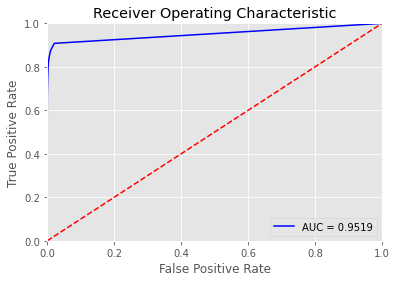

In [90]:
fpr, tpr, threshold = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

print('ROC_AUC = {}'.format(roc_auc))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

saving the dataset

In [94]:
df.to_csv('df_new.csv')

saving the model

In [93]:
import pickle
rfFile = open('rfModel.pckl', 'wb')
pickle.dump(rf_clf, rfFile)
rfFile.close()

### XG Boost

In [95]:
import xgboost as xgb

The below code is for XG boost model and hypertuning of parameters, I am unable to run it due to low system configuration it gets overheated

In [ ]:
xgb_clf=xgb.XGBClassifier(max_depth=3,n_estimators=5000,learning_rate=0.3,n_jobs=-1)

In [ ]:
xgb_clf.fit(X_train,y_train)

In [ ]:
precision_score(y_test,xgb_clf.predict(X_test))

In [ ]:
recall_score(y_test,xgb_clf.predict(X_test))

In [ ]:
roc_auc_score(y_test,xgb_clf.predict(X_test))

In [ ]:
xgb.plot_importance(xgb_clf)

In [ ]:
probabilities = xgb_clf.predict_proba(X_test)
predictY = xgb_clf.predict(X_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

fpr, tpr, threshold = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

print('ROC_AUC = {}'.format(roc_auc))

Hypertuning the parameters using grid search cv

In [ ]:
xgb_clf2=xgb.XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=42)

In [ ]:
param_test1 = {
    'max_depth':range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2,0.1,1]
}

In [ ]:
grid_search = GridSearchCV(xgb_clf2,param_test1,n_jobs=-1,cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
cvxg_clf=grid_search.best_estimator_

In [ ]:
accuracy_score(y_test,cvxg_clf.predict(X_test))

In [ ]:
probabilities = xgb_clf2.predict_proba(X_test)
predictY = xgb_clf2.predict(X_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

fpr, tpr, threshold = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

print('ROC_AUC = {}'.format(roc_auc))